In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
#import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Pako\Desktop\german_credit_data.csv",index_col=0)

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
original_df = df.copy()

In [6]:
df = df.rename(columns={"Credit amount": "Credit_amount"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [8]:
df.describe()

,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [10]:
# Checking missing values
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

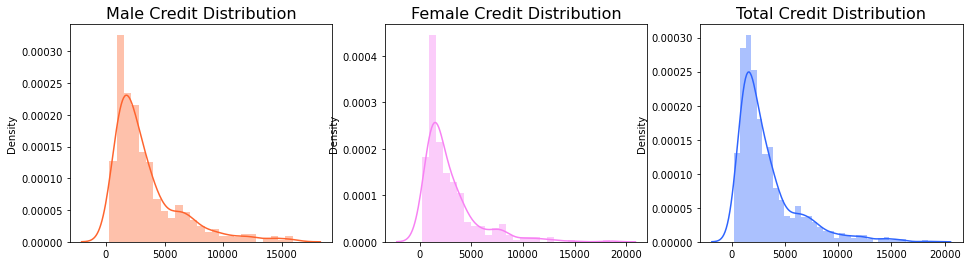

In [11]:
# Distribution of Credit_Amount for each Gender
male_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit_amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

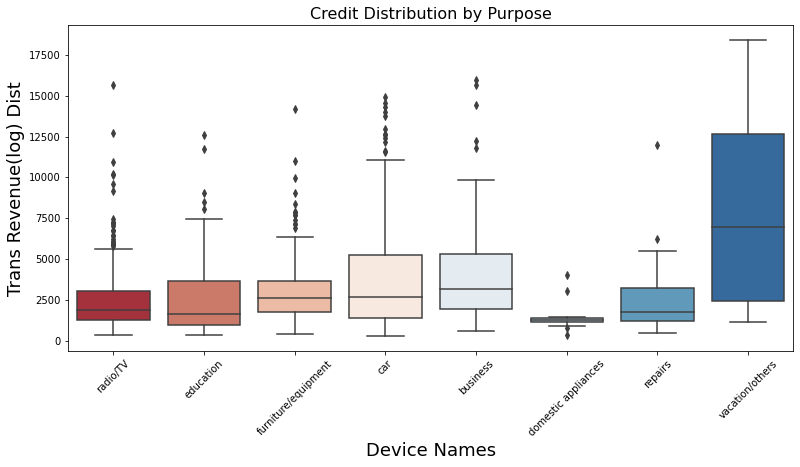

In [12]:
plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit_amount', 
                   data=df, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

### Analysis by Group

#### Gender Analysis

In [13]:
# We have 2x more German males applying for Credit Loans than Females.
df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [14]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [15]:
import chart_studio as cs

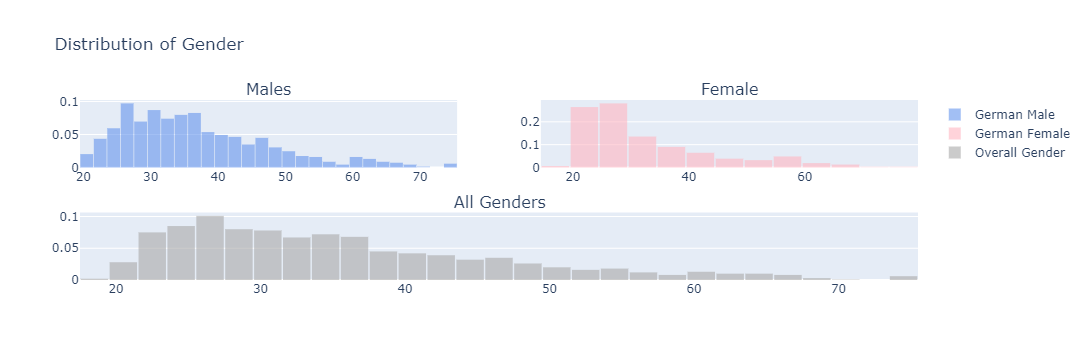

In [16]:
from plotly import tools
#import plotly.plotly as py
import plotly.graph_objs as go

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [17]:
df["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [18]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose


Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


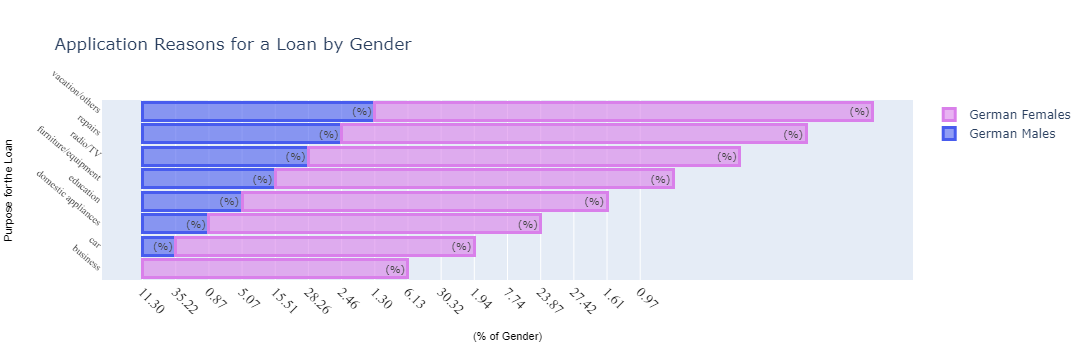

In [19]:
# Values into list
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()

# Round values
male_purpose = ['%.2f' % elem for elem in m_purpose]
female_purpose = ['%.2f' % elem for elem in f_purpose]

male = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=male_purpose,
    name='German Males',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(72, 92, 238, 0.6)',
        line = dict(
            color = 'rgba(72, 92, 238, 1.0)',
            width = 3)
    )
)
female = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=female_purpose,
    name='German Females',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(217, 128, 234, 0.6)',
        line = dict(
            color = 'rgba(217, 128, 234, 1.0)',
            width = 3)
    )
)

data = [male, female]
layout = dict(
    title='Application Reasons for a Loan by Gender',
     xaxis=dict(
        title='(% of Gender)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Purpose for the Loan',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=40,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack'
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

In [20]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


#### Age Groups

In [21]:
df['Age_Group'] = np.nan

In [22]:
# Ok we have to create for each group risky and non-risky loans.
df['Age_Group'] = np.nan

listt = [df]

for col in listt:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder'

In [23]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


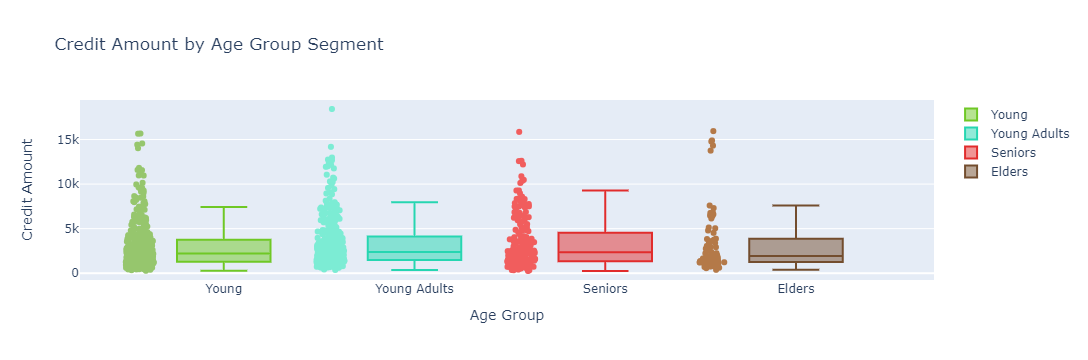

In [24]:
# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()

# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)'),
    line = dict(
        color = 'rgb(111, 200, 37)')
)

young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(124, 236, 212)'),
    line = dict(
        color = 'rgb(38, 214, 177)')
)

senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(241, 93, 93)'),
    line = dict(
        color = 'rgb(225, 44, 44)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)'),
    line = dict(
        color = 'rgb(115, 77, 46)')
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit Amount by Age Group Segment", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")

In [25]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


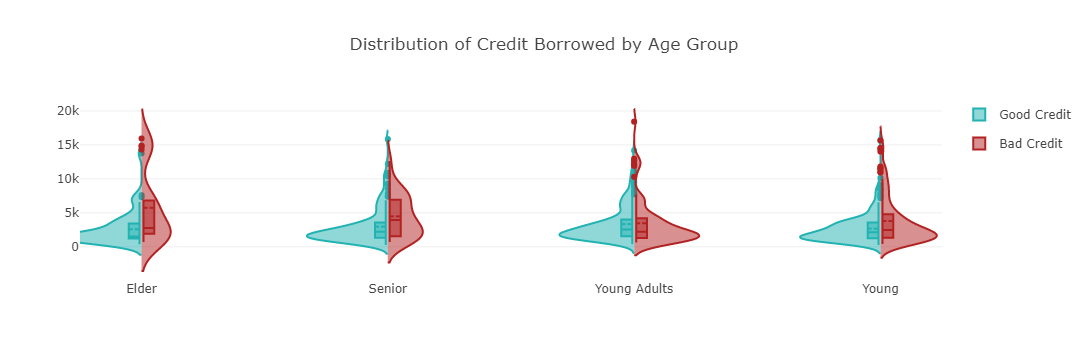

In [26]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_df['Age_Group'],
            "y": good_credit_df['Credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(34, 178, 178)'
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_df['Age_Group'],
            "y": bad_credit_df['Credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(178, 34, 34)'
            }
        }
    ],
    "layout" : {
        "title": "Distribution of Credit Borrowed by Age Group",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename = 'Age-Housing', validate=False)

In [27]:
# Lets find loans by age group and by the level of risk and plot them in a bar chart.

# Age Group Segments
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()

In [28]:
# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

In [29]:
# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))

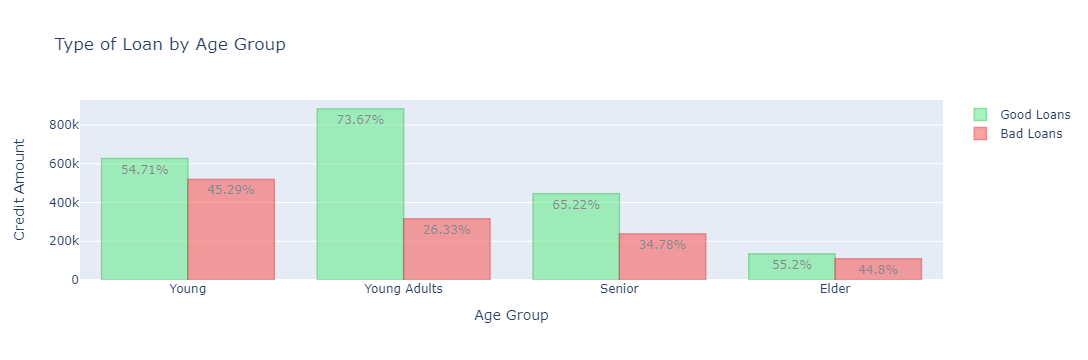

In [30]:
x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

data = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

#### Wealth Analysis

In [31]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [32]:
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
Age_Group             0
dtype: int64

In [33]:
df["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [34]:
df["Saving accounts"].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [35]:
# We have some missing value so we will just ignore the missing values in this analysis.
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')

In [36]:
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


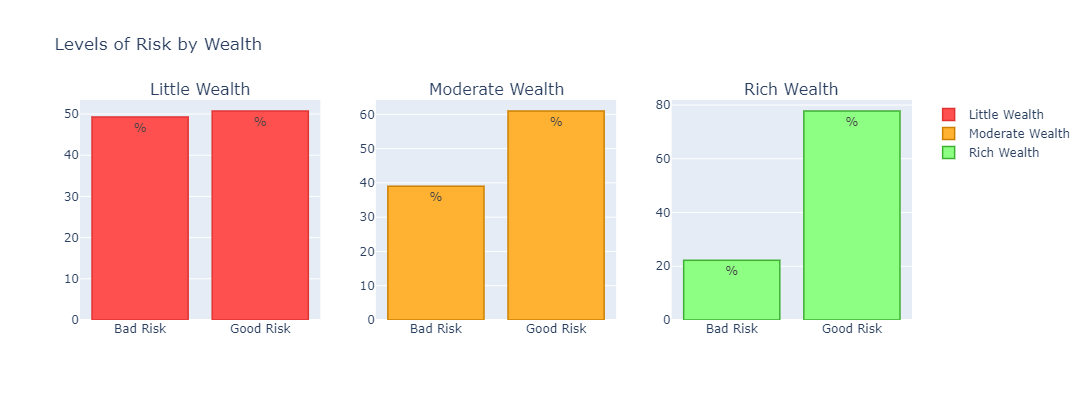

In [37]:
#import plotly.plotly as py
import plotly.graph_objs as go


bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

### High Risk Loans vs Low Risk Loans

In [38]:
df['Risk_int'] = np.nan
listt = [df]

for col in listt:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0 
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1
    
    
df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [39]:
df.corr()

,Age,Job,Credit_amount,Duration,Risk_int
Age,1.000000,0.015673,0.032716,-0.036136,0.091127
Job,0.015673,1.000000,0.285385,0.210910,-0.032735
Credit_amount,0.032716,0.285385,1.000000,0.624984,-0.154739
Duration,-0.036136,0.210910,0.624984,1.000000,-0.214927
Risk_int,0.091127,-0.032735,-0.154739,-0.214927,1.000000


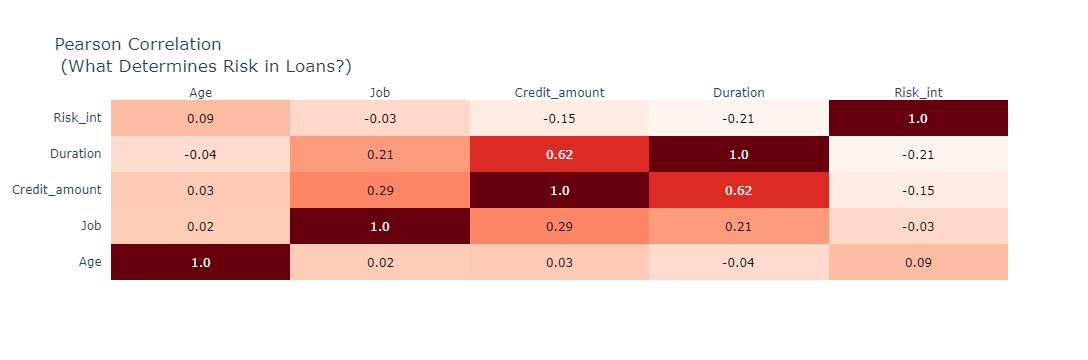

In [40]:
import chart_studio.plotly as cs
import plotly.figure_factory as ff


corr = df.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
iplot(fig, filename='annotated_heatmap')

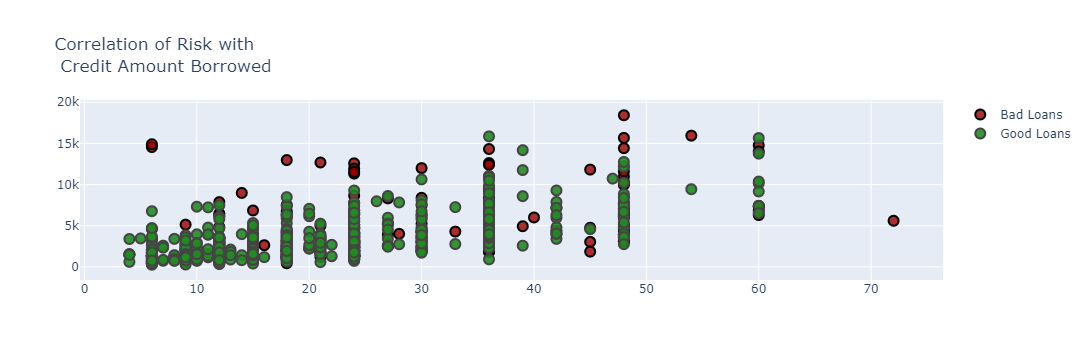

In [41]:
# The higher the credit amount the higher the risk of the loan. Scatter plot?
# The higher the duration of the loan the higher the risk of the loan?

bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()


bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(34, 139, 34, .9)',
        line = dict(
            width = 2,
    
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

### Exploring Purposes of Loans

   radio/TV  education  furniture/equipment      car  business  \
0    696543     169873               555125  1269881    403330   

   domestic appliances  repairs  vacation/others  
0                17976    60018            98512  


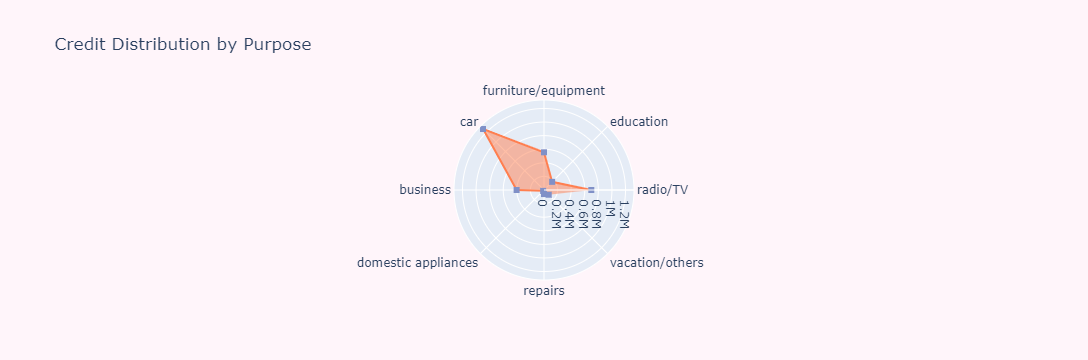

In [42]:
import plotly.graph_objs as go


radio_tv = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'radio/TV'].values)
education = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'education'].values)
furniture = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'furniture/equipment'].values)
car = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'car'].values)
business = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'business'].values)
domestic_app = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'repairs'].values)
vacation_others = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'vacation/others'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=df["Purpose"].unique())

print(df_purposes)

data = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = df['Purpose'].unique().tolist(),
        line = dict(
            color = "#ff7f50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8090c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 245, 250)"
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'polar/basic')

In [43]:
radio_tv = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'radio/TV'].values)
education = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'education'].values)
furniture = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'furniture/equipment'].values)
car = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'car'].values)
business = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'business'].values)
domestic_app = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'repairs'].values)
vacation_others = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'vacation/others'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=df["Purpose"].unique())

print(df_purposes)

   radio/TV  education  furniture/equipment      car  business  \
0    696543     169873               555125  1269881    403330   

   domestic appliances  repairs  vacation/others  
0                17976    60018            98512  


In [44]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [45]:
cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [46]:
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()


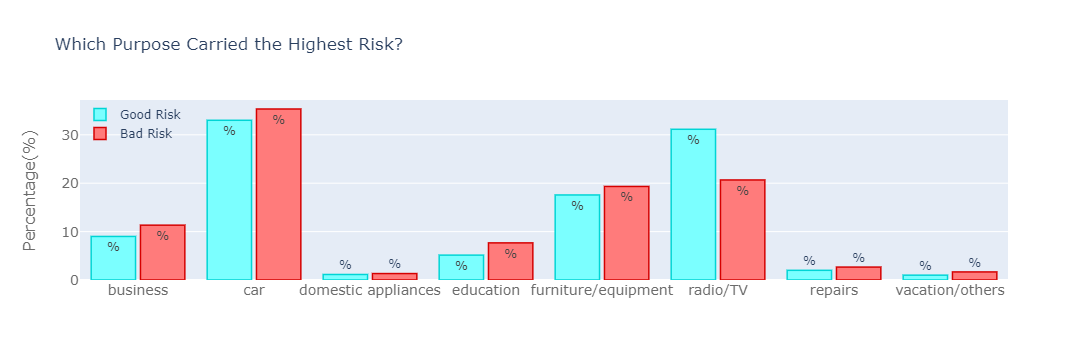

In [47]:
good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Good Risk',
    text='%',
    marker=dict(
        color='rgb(123, 255, 255)',
        line=dict(
            color='rgb(0, 213, 213)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='Bad Risk',
    text = '%',
    marker=dict(
        color='rgb(255, 123, 123)',
        line=dict(
            color='rgb(213, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')


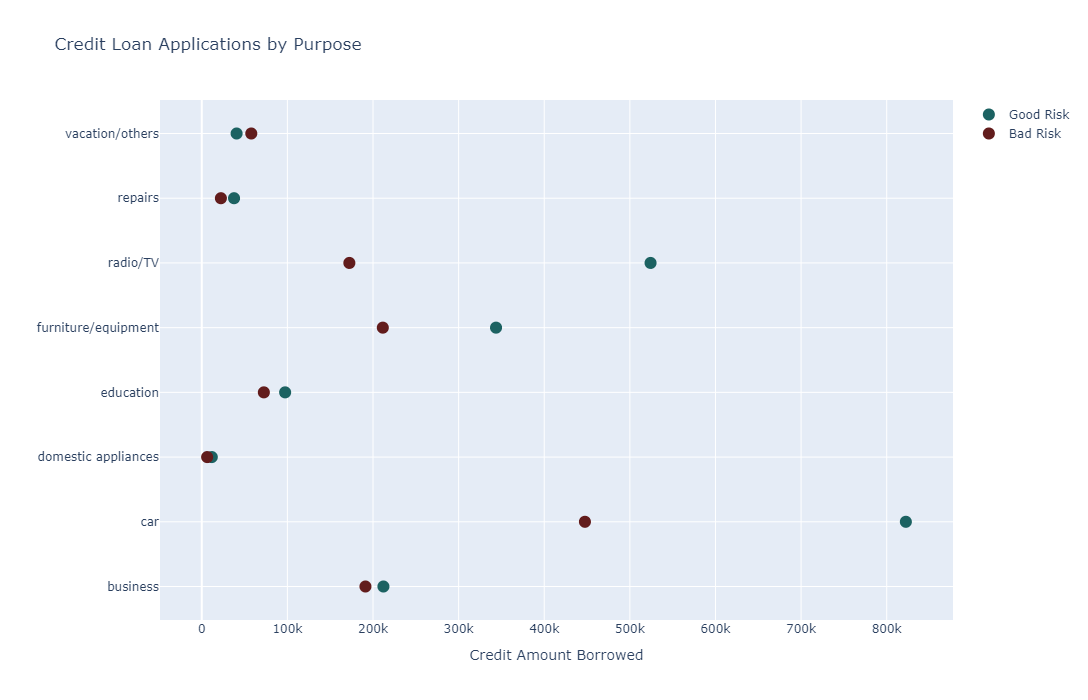

In [48]:
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()

good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()

good_risk = {"x": good_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(28, 98, 98)", "size": 12}, 
          "mode": "markers", 
          "name": "Good Risk", 
          "type": "scatter"
}

bad_risk = {"x": bad_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(98, 28, 28)", "size": 12}, 
          "mode": "markers", 
          "name": "Bad Risk", 
          "type": "scatter", 
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose", 
          "xaxis": {"title": "Credit Amount Borrowed", }, 
          "yaxis": {"title": ""},
         "width": 800,
         "height": 700}

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')